In [4]:
import numpy as np                                                    # Packages for data analysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Circle
from scipy.ndimage import gaussian_filter1d
import braingeneers                                                   # Braingeneers code
from braingeneers.analysis.analysis import SpikeData, read_phy_files, burst_detection
import braingeneers.data.datasets_electrophysiology as ephys
import ipywidgets as ipw
from ipywidgets import interact, interactive, fixed, interact_manual  # package for interactive widgets from IPython.display import HTML, display, Javascript, clear_output,
from IPython.display import HTML, display, Javascript, clear_output

In [5]:
import pickle
file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
sd = pickle.load(file)
file.close()

In [115]:
isi_raw = sd.interspike_intervals()
neuron_isi = []
CVs = []

for i in range(len(c_isi_raw)):   
        isi = isi_raw[i]
        neuron_isi = isi[isi<100].tolist()
        CVs.append(np.std(neuron_isi) / np.mean(neuron_isi))
        
print(CVs)

[0.2708488681688223, 0.4592304410152893, 0.5968723059072221, 0.37128617476567255, 0.5249661793321377, 0.0, 0.5862574920320047, 0.9474497681612438, 0.9884476534293483, 0.5439155738958329, 0.6650504112698916, 0.6237186446037153, 0.23978299595139513, 0.0804970286329927, nan, 0.8996616580233046, 0.0, nan, 0.15415804030730124, nan, 0.157201332267617, 0.0, 0.5311572700298504, 0.5358716288819023, 0.7255228942640107, nan, 0.7094017094017989, 0.6663738787382079, 0.4096534653455851, 0.41754607535877647, nan, 0.6377727522481528, 0.8401833879143555, nan, nan, 0.5214895341571818, 0.24647066955528235, 0.0, 0.6001136377795308, 0.0, 0.201467198513231, 0.2734681336967938, 0.5548134116314691, nan, 0.2389565217391565, 0.5392276039243368, 0.6788488672540465, nan, 0.7123127958298284, 0.5001959492130811, 0.3918330653969323, 0.13865157432364628, nan, nan, 0.6224158139398063, nan, 0.6064050031000795, nan, 0.6520704261577919, 0.16595857270832456, nan, nan, 0.598275792271734, 0.9219319687180116, 0.3247422680412

In [117]:
CVs2 = np.where(np.isnan(CVs), 0, CVs)
print(CVs2)

[0.27084887 0.45923044 0.59687231 0.37128617 0.52496618 0.
 0.58625749 0.94744977 0.98844765 0.54391557 0.66505041 0.62371864
 0.239783   0.08049703 0.         0.89966166 0.         0.
 0.15415804 0.         0.15720133 0.         0.53115727 0.53587163
 0.72552289 0.         0.70940171 0.66637388 0.40965347 0.41754608
 0.         0.63777275 0.84018339 0.         0.         0.52148953
 0.24647067 0.         0.60011364 0.         0.2014672  0.27346813
 0.55481341 0.         0.23895652 0.5392276  0.67884887 0.
 0.7123128  0.50019595 0.39183307 0.13865157 0.         0.
 0.62241581 0.         0.606405   0.         0.65207043 0.16595857
 0.         0.         0.59827579 0.92193197 0.32474227 0.
 0.42948739 0.29861016 0.         0.         0.0864022  0.63606827
 0.26200349 0.62675112 0.52642494 0.         0.54498445 0.65614945
 0.         0.66507047 0.         0.99003559 0.51319717 0.
 0.25769601 0.         0.         0.         0.         0.23683861
 0.46423834 0.02147239 0.42655262 0.5291065

In [136]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []

    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def cv_mapping(sd, threshold=1000): 
    isi_raw = sd.interspike_intervals()
    scale = 20

    """for neuron in isi_raw:
        CVs.append(np.std(neuron) / np.mean(neuron))"""
    
    firing_rates = calculate_mean_firing_rates(sd)
    
    CVsInterim = []
    neuron_isi = []

    for i in range(len(c_isi_raw)):   
            isi = isi_raw[i]
            neuron_isi = isi[isi<100].tolist()
            CVsInterim.append(np.std(neuron_isi) / np.mean(neuron_isi))

    CVs = np.where(np.isnan(CVsInterim), 0, CVsInterim)
    firing_rates = np.where(np.isnan(CVsInterim), 0, firing_rates)
    
    #x = electrode_mapping.x.values
    #y = electrode_mapping.y.values

    sttc = sd.spike_time_tilings()
    
    
    neuron_x = []
    neuron_y = []
    #neuron_amp = []
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
    #     print("x,y:",neuron['position'])
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        #neuron_amp.append(np.mean(neuron['amplitudes']))

    # 
    plt.figure(figsize=(7,5)) 
    ax = plt.axes()
    ax.set_facecolor("grey")
    #plt.scatter(neuron_x,neuron_y, s=neuron_amp, c=vect, cmap = plot_color) # color each plotted neuron according to the values of the eigenvector
    plt.scatter(neuron_x,neuron_y, s=firing_rates*scale, c=CVs, edgecolor='white', linewidth=0.3 cmap = "rainbow") # color each plotted neuron according to the values of the eigenvector
   
    
    for i in range(sttc.shape[0]): # plot connectivity lines between neurons
        for j in range(sttc.shape[1]):

            # Only need to do upper triangle since sttc' = sttc
            if i<=j: continue

            if sttc[i,j] < threshold : continue

            #Position of neuron i
            ix,iy = sd.neuron_data[0][i]['position']
            jx,jy = sd.neuron_data[0][j]['position']

            # Plot line between the points, linewidth is the sttc
            plt.plot([ix,jx],[iy,jy], linewidth=sttc[i,j],c='k')
            
    node_degree_legend_elements = [
        ax.scatter([], [], s=0.25*scale, marker='o', edgecolor='black', facecolor='none', label='0.25'),
        ax.scatter([], [], s=scale, marker='o', edgecolor='black', facecolor='none', label='1'),
        ax.scatter([], [], s=2*scale, marker='o', edgecolor='black', facecolor='none', label='2'),
        ax.scatter([], [], s=4*scale, marker='o', edgecolor='black', facecolor='none', label='4')
    ]
    node_degree_legend = ax.legend(handles=node_degree_legend_elements, title='Firing Rate (Hz)', loc='lower left')
    ax.add_artist(node_degree_legend)
    
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("CV layout")
    plt.colorbar(label="Coefficient of Variation")
    plt.show()
    
    return CVs
    
        

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2555551074.py, line 53)

/tmp/ipykernel_1165590/1729868163.py:41: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


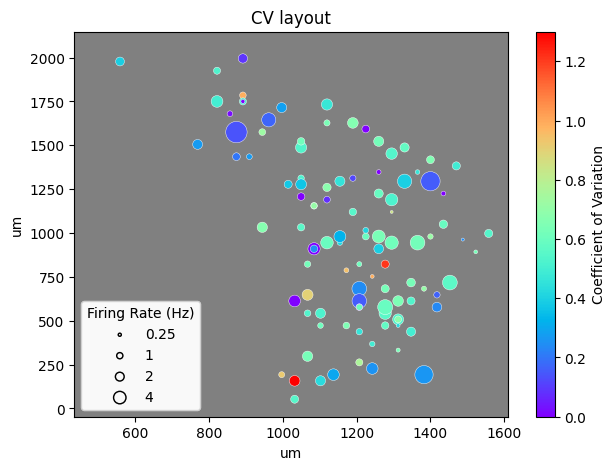

140


In [129]:
cvsd = cv_mapping(sd)
print(len(cvsd))

/tmp/ipykernel_1165590/1637879004.py:41: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


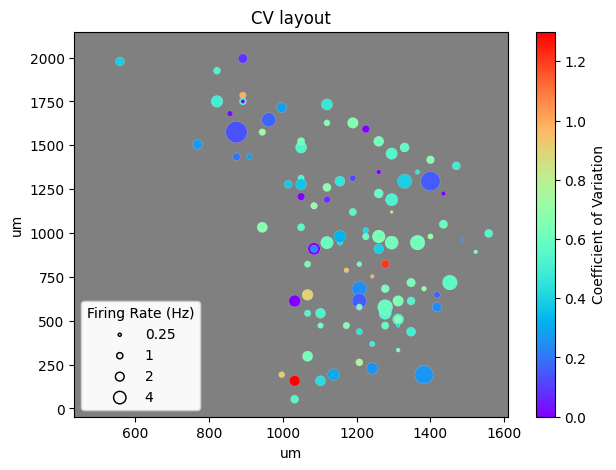

In [135]:
cvsd = cv_mapping(sd)
